In [1]:
import numpy as np

In [2]:
from qiskit import QuantumCircuit

In [3]:
from qiskit import Aer

In [4]:
from qiskit.tools.visualization import plot_histogram, plot_state_city

In [5]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [6]:
simulator=Aer.get_backend('aer_simulator')

In [7]:
from qiskit.circuit.random import random_circuit

In [8]:
qc=[random_circuit(num_qubits=3, depth=4, measure=True) for _ in range(1,11)]

In [9]:
from qiskit import transpile

In [10]:
qc=transpile(qc, simulator)

In [11]:
result=simulator.run(qc).result()

In [12]:
counts=result.get_counts(qc[0])

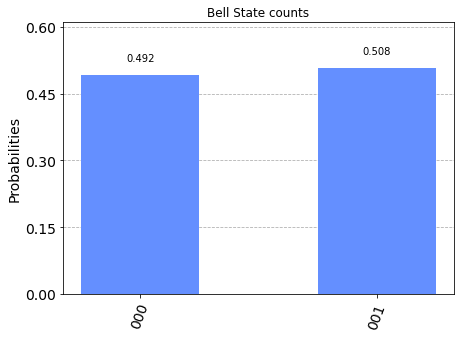

In [13]:
plot_histogram(counts, title="Bell State counts");

In [14]:
from dask.distributed import LocalCluster

In [15]:
local_cluster=LocalCluster(n_workers=1, processes=True)

In [16]:
from dask.distributed import Client

In [17]:
client_local_cluster=Client(local_cluster)

In [18]:
client_local_cluster

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 16,Total memory: 7.70 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44619,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 7.70 GiB
Comm: tcp://192.168.43.239:40781,Total threads: 16
Dashboard: http://192.168.43.239:38083/status,Memory: 7.70 GiB
Nanny: tcp://127.0.0.1:41505,


In [19]:
qbackend = Aer.get_backend('qasm_simulator')

In [20]:
from qiskit import execute

In [21]:
result_ideal = execute(qc, qbackend, executor=client_local_cluster).result()

Simulation failed and returned the following error message:
ERROR: Failed to load qobj: to_json not implemented for this type of object: <class 'distributed.client.Client'>


In [22]:
client_local_cluster.close()

In [23]:
local_cluster.close()